<a href="https://colab.research.google.com/github/REDi-school-ff22-Data-cycle/twitter-sentiment-analysis/blob/main/Twitter_Sentiment_P1_17_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Twitter Sentiment Analysis Climate Change**
By Charles Emeka Onyi & Lucía Morales Lizárraga 

Supervised by Nishtha Jain & Benjamin Feifke

 
Challenge and **data** adquired from: https://www.kaggle.com/datasets/edqian/twitter-climate-change-sentiment-dataset?datasetId=413654

Our **GitHub Repository** where you can find the data set, our colabs and processes: https://github.com/REDi-school-ff22-Data-cycle/twitter-sentiment-analysis



The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo.

This dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were annotated. Each tweet is labelled independently by 3 reviewers. This dataset only contains tweets that all 3 reviewers agreed on (the rest were discarded).

Each tweet is labelled as one of the following classes:

- 2(News): the tweet links to factual news about climate change
- 1(Pro): the tweet supports the belief of man-made climate change
- 0(Neutral: the tweet neither supports nor refutes the belief of man-made climate change
- -1(Anti): the tweet does not believe in man-made climate change

# Outline: 
>1. Create a code that loads and processes the data

>2. Explore the dataset 

>3. Tweets preprosessing techniques 

> 4. Prediction Models: 

>> 4.1 Linear Regression

>> 4.2 Naive Bayes Classifier

>> 4.3 Random Forest Classifier 

>> 4.4 K Nearest Neighbors Classification 

> 5. Feature Engeneering Techniques 

>> 5.1 Classification

>> 5.2 Oversamplong


In [ ]:
# this is a hack to allow displaying more than one result per notebook cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

# 1. Load and process the data 

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/REDi-school-ff22-Data-cycle/twitter-sentiment-analysis/main/twitter_sentiment_data.csv'
df = pd.read_csv(url)
df.head(5)

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


# 2. Exploring the dataset

In [ ]:
# Shape
df.shape

(43943, 3)

,sentiment
1,52.254056
2,21.109164
0,17.556835
-1,9.079944


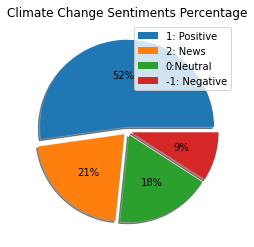

In [ ]:
# Distribution 
sentiment_count =df['sentiment'].value_counts().to_frame()
percentage = (sentiment_count * 100) / df.shape[0]
percentage 

# Pie Chart with pandas 
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05, 0.05)

labels = ['1: Positive', '2: News', '0:Neutral','-1: Negative']
percentage.plot(kind='pie', y='sentiment', labels=labels, autopct='%1.0f%%', explode=explode, shadow=True, legend=True, 
                title='Climate Change Sentiments Percentage', ylabel= '', labeldistance=None)

In [ ]:
df.describe()

,sentiment,tweetid
count,43943.000000,4.394300e+04
mean,0.853924,8.367966e+17
std,0.853543,8.568506e+16
min,-1.000000,5.926334e+17
25%,0.000000,7.970376e+17
50%,1.000000,8.402301e+17
75%,1.000000,9.020003e+17
max,2.000000,9.667024e+17


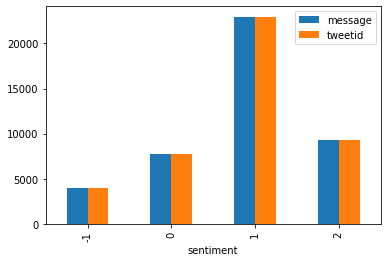

In [ ]:
df.groupby('sentiment').count().plot(kind='bar')

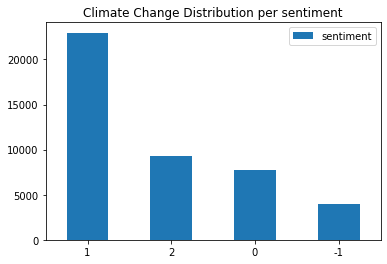

In [ ]:
from matplotlib import pyplot as plt
plot= df['sentiment'].value_counts().plot(kind='bar', rot=0, legend=True, title='Climate Change Distribution per sentiment', ylabel= '')

In [ ]:
# Check whether there is NAs 
df.isna().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

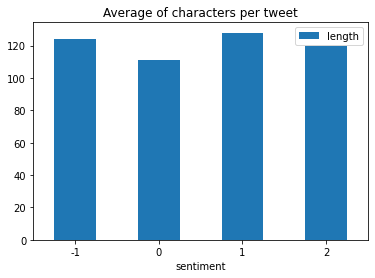

In [ ]:
# Tweets Length

df['length'] = df['message'].str.len()

df.groupby(['sentiment'])['length'].mean().round(0).plot(kind='bar', rot=0, legend=True, title='Average of characters per tweet', ylabel= '')

Text(0.5, 1.0, 'Tweet length for each class')

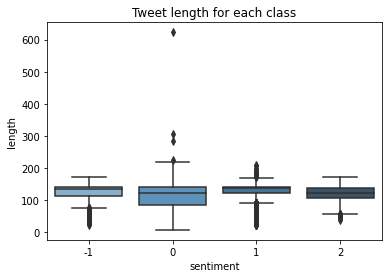

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.boxplot(x=df['sentiment'], y=df['length'], data=df, palette=("Blues_d"))
plt.title('Tweet length for each class')
plt.show()

Lemmatizing

Word Frequency

In [ ]:


# This function determines the frequency of each word in a collection of tweets 
#  and stores the 25 most frequent words in a dataframe, 
#   sorted from most to least frequent

def frequency(tweet):
        
    # Count vectorizer excluding english stopwords
    cv = CountVectorizer(stop_words='english')
    words = cv.fit_transform(tweet)
    
    # Count the words in the tweets and determine the frequency of each word
    sum_words = words.sum(axis=0)
    words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    # Create a dataframe to store the top 25 words and their frequencies
    frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
    frequency = frequency.head(25)
    
    return frequency

# Extract the top 25 words in each class
pro_frequency = frequency(df['lemmatized'][df['sentiment']=='Pro'])
anti_frequency = frequency(df['lemmatized'][df['sentiment']=='Anti'])
news_frequency = frequency(df['lemmatized'][df['sentiment']=='News'])
neutral_frequency = frequency(df['lemmatized'][df['sentiment']=='Neutral'])

KeyError: ignored

Hastags

In [ ]:
import re
import nltk

def hashtag_extract(tweet):
  hashtags = []
  for i in tweet:
    ht = re.findall(r"#(\w+)", i)
    hashtags.append(ht)
        
  hashtags = sum(hashtags, [])
  frequency = nltk.FreqDist(hashtags)
    
  hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                       'count': list(frequency.values())})
  hashtag_df = hashtag_df.nlargest(15, columns="count")

  return hashtag_df

# Extracting the hashtags from tweets in each class
pro = hashtag_extract(df['message'][df['sentiment'] == 1])
anti = hashtag_extract(df['message'][df['sentiment'] == -1])
neutral = hashtag_extract(df['message'][df['sentiment'] == 0])
news = hashtag_extract(df['message'][df['sentiment'] == 2])

pro.head(10)


In [ ]:
anti.head(10)

Word Clouds

In [ ]:
import nltk
from nltk.corpus import stopwords
#print(stopwords.words('english'))

In [ ]:
# We temporaly manually set the list because we got an error with the nltk stopword package. 
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
# Imports
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [ ]:
# Following https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud 


# Create stopword list:
#stopwords = set(STOPWORDS) #Error check later!!! 
#stopwords.update(["br", "href"])
stopwords = stopwordlist # Temporary ----
textt = ''.join(review for review in df.message)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [ ]:
# Further Cloud words 
# Split the data set in each cathegory 

news = df[df['sentiment'] == 2]
positive = df[df['sentiment'] == 1]
neutral = df[df['sentiment'] == 0] 
against = df[df['sentiment'] == -1]


(-0.5, 399.5, 199.5, -0.5)

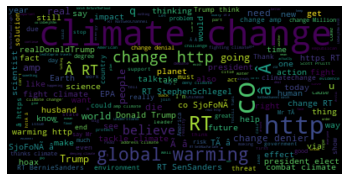

In [ ]:
# Positive
#stopwords = set(STOPWORDS) # We need to fix this problem 
#stopwords.update(["br", "href","good","great"]) 
## good and great removed because they were included in negative sentiment

from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')

pos = " ".join(review for review in positive.message)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

(-0.5, 399.5, 199.5, -0.5)

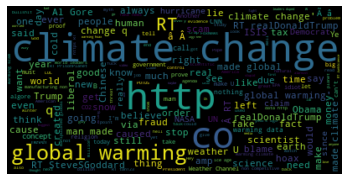

In [ ]:
# Against
pos = " ".join(review for review in against.message)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# We should try to clean it further (check the words: climate change, global...)

# 3. Preprocessing the data  

In [ ]:
!pip install better_profanity # Install it if needed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Convert the column 'message' in a list 

message_list = df.message.to_list()


21/09/22
Source: https://github.com/Deffro/text-preprocessing-techniques/blob/master/techniques.py 



In [ ]:
!pip install requests # If necessary 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
""" Copyright 2017, Dimitrios Effrosynidis, All rights reserved. """
# Functions for preprocessing data

import re
from functools import partial
from collections import Counter
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
# For reading the slang document 
import urllib.request
import requests
import urllib
from urllib.request import urlopen
import urllib3

def removeUnicode(text):
    """ Removes unicode strings like "\u002c" and "x96" """
    text = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', text)       
    text = re.sub(r'[^\x00-\x7f]',r'',text)
    return text

def replaceURL(text):
    """ Replaces url address with "url" """
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','url',text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

def replaceAtUser(text):
    """ Replaces "@user" with "atUser" """
    text = re.sub('@[^\s]+','atUser',text)
    return text

def removeHashtagInFrontOfWord(text):
    """ Removes hastag in front of a word """
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

def removeNumbers(text):
    """ Removes integers """
    text = ''.join([i for i in text if not i.isdigit()])         
    return text

def replaceMultiExclamationMark(text):
    """ Replaces repetitions of exlamation marks """
    text = re.sub(r"(\!)\1+", ' multiExclamation ', text)
    return text

def replaceMultiQuestionMark(text):
    """ Replaces repetitions of question marks """
    text = re.sub(r"(\?)\1+", ' multiQuestion ', text)
    return text

def replaceMultiStopMark(text):
    """ Replaces repetitions of stop marks """
    text = re.sub(r"(\.)\1+", ' multiStop ', text)
    return text

def countMultiExclamationMarks(text):
    """ Replaces repetitions of exlamation marks """
    return len(re.findall(r"(\!)\1+", text))

def countMultiQuestionMarks(text):
    """ Count repetitions of question marks """
    return len(re.findall(r"(\?)\1+", text))

def countMultiStopMarks(text):
    """ Count repetitions of stop marks """
    return len(re.findall(r"(\.)\1+", text))

def countElongated(text):
    """ Input: a text, Output: how many words are elongated """
    regex = re.compile(r"(.)\1{2}")
    return len([word for word in text.split() if regex.search(word)])

def countAllCaps(text):
    """ Input: a text, Output: how many words are all caps """
    return len(re.findall("[A-Z0-9]{3,}", text))

#""" Creates a dictionary with slangs and their equivalents and replaces them """
#slang_url ='https://raw.githubusercontent.com/Deffro/text-preprocessing-techniques/master/slang.txt'
#for line in urllib.request.urlopen(slang_url):
#    slang_txt = (line.decode('utf-8')) 

#with open(slang_txt) as file:
#    slang_map = dict(map(str.strip, line.partition('\t')[::2])
#    for line in file if line.strip())

#slang_words = sorted(slang_map, key=len, reverse=True) # longest first for regex
#regex = re.compile(r"\b({})\b".format("|".join(map(re.escape, slang_words))))
#replaceSlang = partial(regex.sub, lambda m: slang_map[m.group(1)])

#def countSlang(text):
#    """ Input: a text, Output: how many slang words and a list of found slangs """
#    slangCounter = 0
#    slangsFound = []
#    tokens = nltk.word_tokenize(text)
#    for word in tokens:
#        if word in slang_words:
#            slangsFound.append(word)
#            slangCounter += 1
#    return slangCounter, slangsFound

""" Replaces contractions from a string to their equivalents """
contraction_patterns = [ (r'won\'t', 'will not'), (r'can\'t', 'cannot'), (r'i\'m', 'i am'), (r'ain\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                         (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'), (r'(\w+)\'d', '\g<1> would'), (r'&', 'and'), (r'dammit', 'damn it'), (r'dont', 'do not'), (r'wont', 'will not') ]
def replaceContraction(text):
    patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, text)
    return text

def replaceElongated(word):
    """ Replaces an elongated word with its basic form, unless the word exists in the lexicon """

    repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
    repl = r'\1\2\3'
    if wordnet.synsets(word):
        return word
    repl_word = repeat_regexp.sub(repl, word)
    if repl_word != word:      
        return replaceElongated(repl_word)
    else:       
        return repl_word

def removeEmoticons(text):
    """ Removes emoticons from text """
    text = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', '', text)
    return text

def countEmoticons(text):
    """ Input: a text, Output: how many emoticons """
    return len(re.findall(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', text))


### Spell Correction begin ###
""" Spell Correction http://norvig.com/spell-correct.html """
def words(text): return re.findall(r'\w+', text.lower())

#WORDS = Counter(words(open('corporaForSpellCorrection.txt').read()))

#def P(word, N=sum(WORDS.values())): 
#    """P robability of `word`. """
#    return WORDS[word] / N

def spellCorrection(word): 
    """ Most probable spelling correction for word. """
    return max(candidates(word), key=P)

def candidates(word): 
    """ Generate possible spelling corrections for word. """
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    """ The subset of `words` that appear in the dictionary of WORDS. """
    return set(w for w in words if w in WORDS)

def edits1(word):
    """ All edits that are one edit away from `word`. """
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    """ All edits that are two edits away from `word`. """
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

### Spell Correction End ###

### Replace Negations Begin ###

def replace(word, pos=None):
    """ Creates a set of all antonyms for the word and if there is only one antonym, it returns it """
    antonyms = set()
    for syn in wordnet.synsets(word, pos=pos):
      for lemma in syn.lemmas():
        for antonym in lemma.antonyms():
          antonyms.add(antonym.name())
    if len(antonyms) == 1:
      return antonyms.pop()
    else:
      return None

def replaceNegations(text):
    """ Finds "not" and antonym for the next word and if found, replaces not and the next word with the antonym """
    i, l = 0, len(text)
    words = []
    while i < l:
      word = text[i]
      if word == 'not' and i+1 < l:
        ant = replace(text[i+1])
        if ant:
          words.append(ant)
          i += 2
          continue
      words.append(word)
      i += 1
    return words

### Replace Negations End ###

def addNotTag(text):
	""" Finds "not,never,no" and adds the tag NEG_ to all words that follow until the next punctuation """
	transformed = re.sub(r'\b(?:not|never|no)\b[\w\s]+[^\w\s]', 
       lambda match: re.sub(r'(\s+)(\w+)', r'\1NEG_\2', match.group(0)), 
       text,
       flags=re.IGNORECASE)
	return transformed

def addCapTag(word):
    """ Finds a word with at least 3 characters capitalized and adds the tag ALL_CAPS_ """
    if(len(re.findall("[A-Z]{3,}", word))):
        word = word.replace('\\', '' )
        transformed = re.sub("[A-Z]{3,}", "ALL_CAPS_"+word, word)
        return transformed
    else:
        return word

' Copyright 2017, Dimitrios Effrosynidis, All rights reserved. '

' Replaces contractions from a string to their equivalents '

' Spell Correction http://norvig.com/spell-correct.html '

In [ ]:
# Preprocessing our data set: 

# 1. Remove Unicode
cleaned_list_1 = []
for tweet in message_list: 
  string = removeUnicode(tweet)
  cleaned_list_1.append(string)

# 2. .Replace URL
cleaned_list_2 = []
for tweet in cleaned_list_1: 
  string = replaceURL(tweet)
  cleaned_list_2.append(string)

# 3. Replace @User
cleaned_list_3 = []
for tweet in cleaned_list_2: 
  string = replaceAtUser(tweet)
  cleaned_list_3.append(string)

# 4. Remove # in front of words 
cleaned_list_4 = []
for tweet in cleaned_list_3: 
  string = removeHashtagInFrontOfWord(tweet)
  cleaned_list_4.append(string)

# 5. Remove numbers
cleaned_list_5 = []
for tweet in cleaned_list_4: 
  string = removeNumbers(tweet)
  cleaned_list_5.append(string)

# 6. Replace multi exclamation marks 
cleaned_list_6 = []
for tweet in cleaned_list_5: 
  string = replaceMultiExclamationMark(tweet)
  cleaned_list_6.append(string)

# 7. Replace Multi Question Mark
cleaned_list_7 = []
for tweet in cleaned_list_6: 
  string = replaceMultiQuestionMark(tweet)
  cleaned_list_7.append(string)

# 8. Replace multistop Mark
cleaned_list_8 = []
for tweet in cleaned_list_7: 
  string = replaceMultiStopMark(tweet)
  cleaned_list_8.append(string)

# 9. Deal with slang
cleaned_list_9 = []
for tweet in cleaned_list_8: 
  string = replaceContraction(tweet)
  cleaned_list_9.append(string)

# We Skiped replaceElongated(word) It doesn't work on our data set.

# 10. Remove emoticons 
cleaned_list_10 = []
for tweet in cleaned_list_9: 
  string = removeEmoticons(tweet)
  cleaned_list_10.append(string)

# 11. Replace negations

#cleaned_list_11 = [] 

#Doesn't work 
#for tweet in cleaned_list_10: 
#  string = replaceNegations(tweet)
#  cleaned_list_11.append(string)

In [ ]:
# View the first elements of the list. 
cleaned_list_10[0:1]


['atUser climate change is an interesting hustle as it was global warming but the planet stopped warming for  yes while the suv boom']

3.2: Join the list in a new df with the sentiments column

In [ ]:
# Join list in a new df with the sentiments. 
# We need to join: 'df.sentiment' & 'cleaned_list_10'

df2 = pd.DataFrame(list(zip(df.sentiment, cleaned_list_10)),
                   columns = ['sentiment', 'tweets'])
df2.head(10)

,sentiment,tweets
0,-1,atUser climate change is an interesting hustle...
1,1,"RT atUser Watch BeforeTheFlood right here, as ..."
2,1,Fabulous! Leonardo DiCaprio is film on climate...
3,1,RT atUser Just watched this amazing documentar...
4,2,"RT atUser Pranita Biswasi, a Lutheran from Odi..."
5,0,Unamshow awache kujinga na iko global warming url
6,2,"RT atUser Pranita Biswasi, a Lutheran from Odi..."
7,2,RT atUser Presidential Candidate DonaldTrump i...
8,0,RT atUser Leonardo DiCaprio is climate change ...
9,1,BeforeTheFlood Watch BeforeTheFlood right here...


#  **4. Feature Engineering Techniques for Machine Learning**

## 4.1 Distribution 

df3

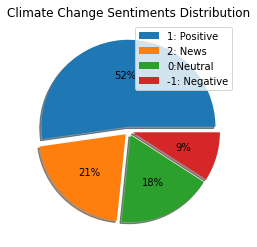

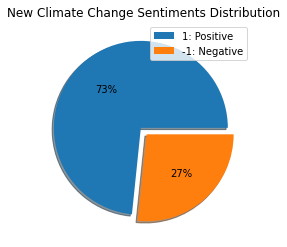

In [ ]:
# Distribution 

from pickle import TRUE

df2['sentiment_1'] = df2['sentiment'].apply(lambda rating : +1 if rating >= 1 else -1)
#df2.head(10)

df3 = df2.drop(columns= ['sentiment'], )#inplace= True)

# Pie Chart with pandas 
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05, 0.05)

labels = ['1: Positive', '2: News', '0:Neutral','-1: Negative']
percentage.plot(kind='pie', y='sentiment', labels=labels, autopct='%1.0f%%', explode=explode, shadow=True, legend=True, 
                title='Climate Change Sentiments Distribution', ylabel= '', labeldistance=None)


# Pie Chart Sentiments_1 column 
# Define the ratio of gap of each fragment in a tuple
#sentiment_count =df['sentiment'].value_counts().to_frame()
#percentage = (sentiment_count * 100) / df.shape[0]
explode = (0.05, 0.05)

df3_counts = df3['sentiment_1'].value_counts().to_frame()
percentage2 = (df3_counts * 100)/df3.shape[0]
labels2 = ['1: Positive', '-1: Negative']
percentage2.plot(kind='pie', y='sentiment_1', labels=labels2, autopct='%1.0f%%', explode=explode, shadow=True, legend=True, title='New Climate Change Sentiments Distribution', ylabel= '', labeldistance=None)

## **4.2 Oversampling**

df.upsampled

,tweets
sentiment_1,
-1,11705
1,32238


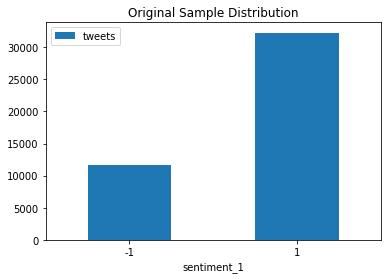

In [ ]:
df3.groupby('sentiment_1').count().plot(kind='bar', rot=0, legend=True, title='Original Sample Distribution', ylabel= '')
df3.groupby('sentiment_1').count()

AxesSubplot(0.125,0.125;0.775x0.755)


-1    36548
 1    32238
Name: sentiment_1, dtype: int64

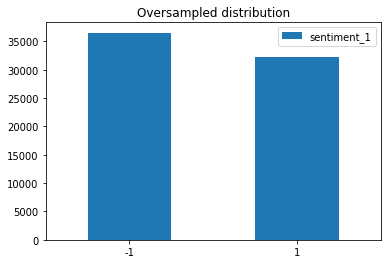

In [ ]:
# From: https://michael-fuchs-python.netlify.app/2020/01/16/dealing-with-imbalanced-classes/
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

## conda install -c glemaitre imbalanced-learn
from imblearn.over_sampling import SMOTE

#For undersampling
#from imblearn.under_sampling import NearMiss


# Separate majority and minority classes
df_majority = df3[df3.sentiment_1==1]
df_minority = df3[df3.sentiment_1==-1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,      # sample with replacement
                                 n_samples=36548)   # to match majority class
                              
 
#Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])


#df_upsampled.head(10)
print(df_upsampled['sentiment_1'].value_counts().plot(kind='bar', rot=0, legend=True, title='Oversampled distribution', ylabel= ''))
df_upsampled['sentiment_1'].value_counts()



# **5. Classification Models**


## 5.1 Linear Regression

Vectorize & split into test and train
Split the data frame into  train and test sets .80% of the data will be used for training, and 20% will be used for testing. 

Taken from: https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6

In [ ]:
# Random split train and test data. 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2['tweets'], df2['sentiment'], test_size=0.33, random_state=42)

Create a bag of words
- Use a count vectorizer from the Scikit-learn library. 

This will transform the text in our data frame into a bag of words model, which will contain a sparse matrix of integers. The number of occurrences of each word will be counted and printed.

We will need to convert the text into a bag-of-words model since the logistic regression algorithm cannot understand text.


In [ ]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(X_train)
test_matrix = vectorizer.transform(X_test)

Import logistic regression 

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

Fit the model on the data

In [ ]:
# Error fitting the trains but it works anyways.
#"Your session failed because all available RAM was used. If you want to access large RAM execution environments check Colab Pro"
lr.fit(train_matrix,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

Make predictions 

In [ ]:
predictions = lr.predict(test_matrix)

Testing 

In [ ]:
# To test the accuracy of the model: 
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

# The results should be a confusion matrix 

array([[ 623,  149,  146,   22],
       [ 241, 1334,  566,  102],
       [ 337,  930, 6372,  641],
       [  68,  192,  485, 2294]])

In [ ]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.49      0.66      0.56       940
           0       0.51      0.59      0.55      2243
           1       0.84      0.77      0.80      8280
           2       0.75      0.75      0.75      3039

    accuracy                           0.73     14502
   macro avg       0.65      0.70      0.67     14502
weighted avg       0.75      0.73      0.74     14502



Session 26/09 


### 5.1.1 Linear Regression Model on Redistributed data

In [ ]:
# Linear Regression Model on Subcathegorized data
# Random split train and test data. 
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df3['tweets'], df3['sentiment_1'], test_size=0.33, random_state=42)

In [ ]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(X_train)
test_matrix = vectorizer.transform(X_test)


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
# Fit
# Try to optimize it 
lr.fit(train_matrix,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
predictions = lr.predict(test_matrix)

In [ ]:
# To test the accuracy of the model: 
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

# The results should be a confusion matrix

array([[2355,  795],
       [1519, 9833]])

In [ ]:
print(classification_report(predictions,y_test))


              precision    recall  f1-score   support

          -1       0.61      0.75      0.67      3150
           1       0.93      0.87      0.89     11352

    accuracy                           0.84     14502
   macro avg       0.77      0.81      0.78     14502
weighted avg       0.86      0.84      0.85     14502



### 5.1.2 Linear Regression Model on oversampled data

In [ ]:
# Split 3 

X_train, X_test, y_train, y_test = train_test_split(df_upsampled['tweets'], df_upsampled['sentiment_1'], test_size=0.33, random_state=42)

In [ ]:
# count vectorizer 3:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(X_train)
test_matrix = vectorizer.transform(X_test)


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
# Fit
# Try to optimize it 
lr.fit(train_matrix,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
predictions = lr.predict(test_matrix)

In [ ]:
# To test the accuracy of the model: 
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

# The results should be a confusion matrix

array([[10974,  1828],
       [ 1154,  8744]])

In [ ]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.90      0.86      0.88     12802
           1       0.83      0.88      0.85      9898

    accuracy                           0.87     22700
   macro avg       0.87      0.87      0.87     22700
weighted avg       0.87      0.87      0.87     22700



## 5.2 Naive Bayes Classifier

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB


In [ ]:
# Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
# Naïve Bayes:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB())])

In [ ]:
# For the presentation, we moved this next step further down.
df4 = df2.drop(columns= ['sentiment_1'], )#inplace= True)


In [ ]:
# Split 4 

X_train, X_test, y_train, y_test = train_test_split(df4['tweets'], df4['sentiment'], test_size=0.33, random_state=42)

In [ ]:
# Train model 
# Niave bayes
nb.fit(X_train, y_train)


In [ ]:
y_pred_nb = nb.predict(X_test)

In [ ]:
# Generate a classification Report for the Naive Bayes model
print(metrics.classification_report(y_test, y_pred_nb))


              precision    recall  f1-score   support

          -1       0.91      0.03      0.05      1269
           0       0.96      0.07      0.12      2605
           1       0.58      0.99      0.73      7569
           2       0.87      0.38      0.53      3059

    accuracy                           0.61     14502
   macro avg       0.83      0.36      0.36     14502
weighted avg       0.74      0.61      0.52     14502



In [ ]:
# Generate a normalized confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap


### 5.2.1 Naive Bayes Classifier on Redistributed data (2 sentiments)

In [ ]:
# Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
# Naïve Bayes:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB())])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df3['tweets'], df3['sentiment_1'], test_size=0.33, random_state=42)

In [ ]:
# Train model 
# Niave bayes
nb.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
y_pred_nb = nb.predict(X_test)

In [ ]:
# Generate a classification Report for the Naive Bayes model
print(metrics.classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

          -1       0.93      0.13      0.23      3874
           1       0.76      1.00      0.86     10628

    accuracy                           0.77     14502
   macro avg       0.85      0.56      0.55     14502
weighted avg       0.80      0.77      0.69     14502



## 5.3 Support Vector Machine 

In [ ]:
# Linear SVC:
from sklearn.svm import LinearSVC

#df4 is the df we are using for this model 

# Pipeline
lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', LinearSVC(class_weight='balanced'))])


In [ ]:
# Split 5 (Rerun split 4. )
X_train, X_test, y_train, y_test = train_test_split(df4['tweets'], df4['sentiment'], test_size=0.33, random_state=42)

In [ ]:
# Train the model - Linear SVC
lsvc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', LinearSVC(class_weight='balanced'))])

In [ ]:
y_pred_lsvc = lsvc.predict(X_test)

In [ ]:
# Generate a classification Report for the linear SVC model
print(metrics.classification_report(y_test, y_pred_lsvc))

              precision    recall  f1-score   support

          -1       0.54      0.58      0.56      1269
           0       0.56      0.52      0.54      2605
           1       0.80      0.78      0.79      7569
           2       0.71      0.79      0.75      3059

    accuracy                           0.72     14502
   macro avg       0.65      0.67      0.66     14502
weighted avg       0.72      0.72      0.72     14502



Text(0.5, 1.0, 'Linear SVC classification')

Text(33.0, 0.5, 'True label')

Text(0.5, 15.0, 'Predicted label')

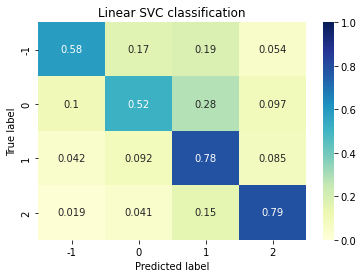

In [ ]:
# Generate a normalized confusion matrix
cm = confusion_matrix(y_test, y_pred_lsvc)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=lsvc.classes_, 
            yticklabels=lsvc.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Linear SVC classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 5.3 Support Vector Machine on Redistributed data (2 sentiments)

In [ ]:
# Pipeline
lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', LinearSVC(class_weight='balanced'))])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df3['tweets'], df3['sentiment_1'], test_size=0.33, random_state=42)

In [ ]:
# Train the model - Linear SVC
lsvc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', LinearSVC(class_weight='balanced'))])

In [ ]:
y_pred_lsvc = lsvc.predict(X_test)

In [ ]:
# Generate a classification Report for the linear SVC model
print(metrics.classification_report(y_test, y_pred_lsvc))

              precision    recall  f1-score   support

          -1       0.64      0.72      0.68      3874
           1       0.89      0.85      0.87     10628

    accuracy                           0.82     14502
   macro avg       0.77      0.78      0.77     14502
weighted avg       0.82      0.82      0.82     14502



Text(0.5, 1.0, 'Linear SVC classification')

Text(33.0, 0.5, 'True label')

Text(0.5, 15.0, 'Predicted label')

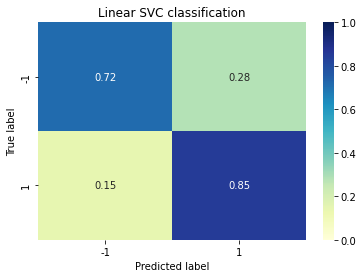

In [ ]:
# Generate a normalized confusion matrix
cm = confusion_matrix(y_test, y_pred_lsvc)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=lsvc.classes_, 
            yticklabels=lsvc.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Linear SVC classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 5.4 Random Forest Classifier 


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Pipeline

rf = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', RandomForestClassifier(max_depth=5, 
                                              n_estimators=100))])

# Split
X_train, X_test, y_train, y_test = train_test_split(df4['tweets'], df4['sentiment'], test_size=0.33, random_state=42)

In [ ]:
# Random forest 
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(max_depth=5))])

In [ ]:
# Model evaluation 
# Generate a classification Report for the random forest model
print(metrics.classification_report(y_test, y_pred_rf))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1269
           0       0.00      0.00      0.00      2605
           1       0.52      1.00      0.69      7569
           2       0.00      0.00      0.00      3059

    accuracy                           0.52     14502
   macro avg       0.13      0.25      0.17     14502
weighted avg       0.27      0.52      0.36     14502



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
print(cm)

[[   0    0 1269    0]
 [   0    0 2605    0]
 [   0    0 7569    0]
 [   0    0 3059    0]]


### 5.4.1 Random Forest on Redistributed data (2 sentiments)

In [ ]:
# Random Forest 2.0 
# For this model we use df3 (2 sentiment data)
# Random Forest Classifier
rf = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', RandomForestClassifier(max_depth=5, 
                                              n_estimators=100))])

In [ ]:
# Split 6
X_train, X_test, y_train, y_test = train_test_split(df3['tweets'], df3['sentiment_1'], test_size=0.33, random_state=42)

In [ ]:
# Fit & Preedicition
# Random forest 
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(max_depth=5))])

In [ ]:
# Model evaluation 
# Generate a classification Report for the random forest model
print(metrics.classification_report(y_test, y_pred_rf))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      3874
           1       0.73      1.00      0.85     10628

    accuracy                           0.73     14502
   macro avg       0.37      0.50      0.42     14502
weighted avg       0.54      0.73      0.62     14502



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### 5.4.2 Random Forest on Oversampled data 

In [ ]:
# We got the same error `zero_division` error, so we are tying with Split 3 
X_train, X_test, y_train, y_test = train_test_split(df_upsampled['tweets'], df_upsampled['sentiment_1'], test_size=0.33, random_state=42)

In [ ]:
# Fit & Preedicition
# Random forest 
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
# Model evaluation 
# Generate a classification Report for the random forest model
print(metrics.classification_report(y_test, y_pred_rf))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(max_depth=5))])

              precision    recall  f1-score   support

          -1       0.58      0.99      0.73     12128
           1       0.95      0.17      0.29     10572

    accuracy                           0.61     22700
   macro avg       0.76      0.58      0.51     22700
weighted avg       0.75      0.61      0.52     22700



## 5.5 K Nearest Neighbors classification

In [ ]:
# K-NN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', KNeighborsClassifier(n_neighbors=5, 
                                             metric='minkowski', 
                                             p=2))])

In [ ]:
# Split 7
X_train, X_test, y_train, y_test = train_test_split(df4['tweets'], df4['sentiment'], test_size=0.33, random_state=42)

In [ ]:
# K - nearest neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())])

In [ ]:
# Generate a classification Report for the K-nearest neighbors model
print(metrics.classification_report(y_test, y_pred_knn))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

              precision    recall  f1-score   support

          -1       0.49      0.38      0.43      1269
           0       0.43      0.49      0.46      2605
           1       0.72      0.72      0.72      7569
           2       0.65      0.63      0.64      3059

    accuracy                           0.63     14502
   macro avg       0.57      0.56      0.56     14502
weighted avg       0.63      0.63      0.63     14502



### 5.5.1 K Nearest Neighbors classification on Redistributed data (2 sentiments)

In [ ]:
knn = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', KNeighborsClassifier(n_neighbors=5, 
                                             metric='minkowski', 
                                             p=2))])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df3['tweets'], df3['sentiment_1'], test_size=0.33, random_state=42)

In [ ]:
# K - nearest neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())])

In [ ]:
# Generate a classification Report for the K-nearest neighbors model
print(metrics.classification_report(y_test, y_pred_knn))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

              precision    recall  f1-score   support

          -1       0.63      0.54      0.58      3874
           1       0.84      0.88      0.86     10628

    accuracy                           0.79     14502
   macro avg       0.73      0.71      0.72     14502
weighted avg       0.78      0.79      0.79     14502



Still to try on: Feature engineering techniques: bag of words, bi-gram, n-gram models, word2Vec, Word embeddings

# **References** -- 

- Effrosyinidis, Dimittrios (2019): 16 Text Preprocessing Techniques in Python for Twitter Sentiment Analysis. Available online https://github.com/Deffro/text-preprocessing-techniques, Last update: 16/04/2019, Última comprobación el 17/10/2022.


- Effrosyinidis, Dimittrios; Symeonidis, Symeon; Arampatzis, Avi (2017): A Comparison of Pre-processing Techniques for Twitter Sentiment Analysis. En: Research and Advanced Technology for Digital Libraries. TPDL 2017. Lecture Notes in Computer Science vol 10450. Available online https://doi.org/10.1007/978-3-319-67008-9_31.

- Meinie, Nicole (2020): Sentiment analysis: Twitter on climate change. Available online: https://www.kaggle.com/code/nicolemeinie/sentiment-analysis-twitter-on-climate-change/notebook, Last seen: 17/10/2022.

- Quian, Edward (2018):
Twitter Cimate Change Sentiment Dataset.
Available online: https://www.kaggle.com/datasets/edqian/twitter-climate-change-sentiment-dataset?datasetId=413654, Last seen: 17/10/2022.

- Selvaraj, Natasha (2020): A Beginner's Guide to Sentiment Analysis with Python. Puublished in Towards Data Science. Available online: https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6, Last update: 12/09/2020, Last seen: 17/10/2022.